In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import random
import os
import json
import cv2 
import copy

import matplotlib.patches as patches

In [2]:
class_names=['cat','dog']
with open('cat_dog_annotations.json', 'r') as f:
    json_dict = json.load(f)
json_dict.keys()
data=json_dict["_via_img_metadata"].values()
# Process the images and regions

annotations = []
for image in data:
    filename = image["filename"]
    width, height = None, None
    with Image.open(filename) as img:
        width, height = img.size
    for region in image["regions"]:
        class_name = list(region["region_attributes"]["class"].keys())[0]
        x, y, w, h = region["shape_attributes"]["x"], region["shape_attributes"]["y"], region["shape_attributes"]["width"], region["shape_attributes"]["height"]
        center_x = (x + w/2) / width
        center_y = (y + h/2) / height
        norm_w = w / width
        norm_h = h / height
        class_id = class_names.index(class_name)
        annotations.append(f"{class_id} {center_x} {center_y} {norm_w} {norm_h}\n")
print("annotations_file is appended successfully")



annotations_file is appended successfully


In [3]:
# Step 5: Save the YOLO formatted annotations and labels
with open("annotations.txt", "w") as f:
    f.writelines(annotations)
print("annotations.txt is created successfully and saved in current directory\n")
with open("labels.txt", "w") as f:
    f.writelines("\n".join(class_names))
print("label.txt is created successfully and saved in current directory")

annotations.txt is created successfully and saved in current directory

label.txt is created successfully and saved in current directory


In [11]:
input_dir="images/"
output_dir="resized_img/"

size=3    
# Create a labels file
labels_file = open(os.path.join(output_dir, "labels.txt"), "w")

for filename in os.listdir(input_dir):
    img=Image.open(os.path.join(input_dir,filename))
    img.save(os.path.join(output_dir,filename))
    labels_file.write(filename + " original\n")
#     plt.imshow(img)
#     plt.show()
    

    for i in range(size):

        new_img=img.resize((200,160)) 
        output_filename = f'{os.path.splitext(filename)[0]}_size_{i}.jpg'
        new_img.save(os.path.join(output_dir, output_filename))
        labels_file.write(output_filename + " resize\n")
#         plt.imshow(new_img)
#         plt.show()
        

    


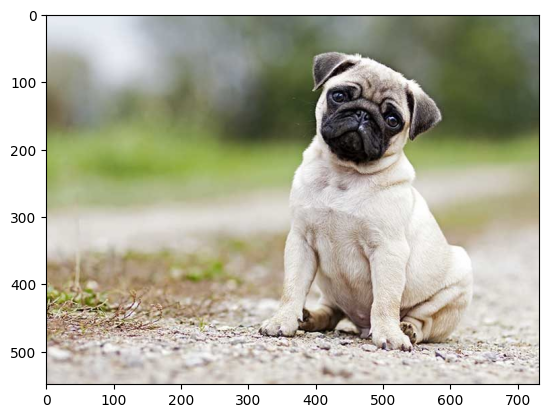

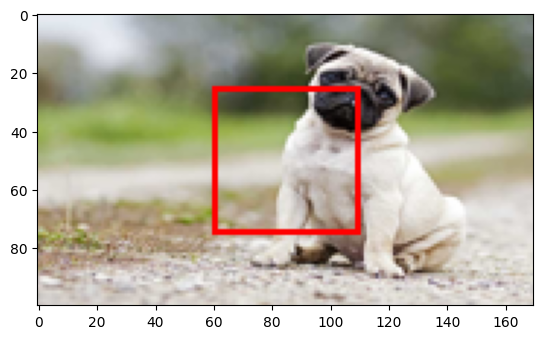

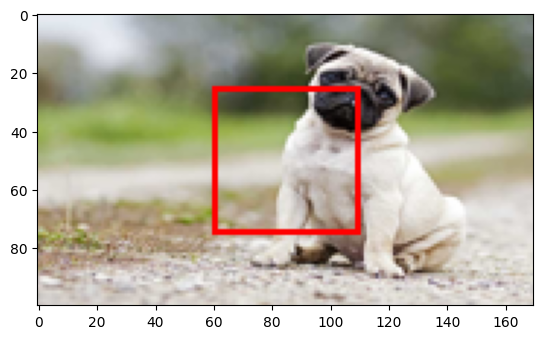

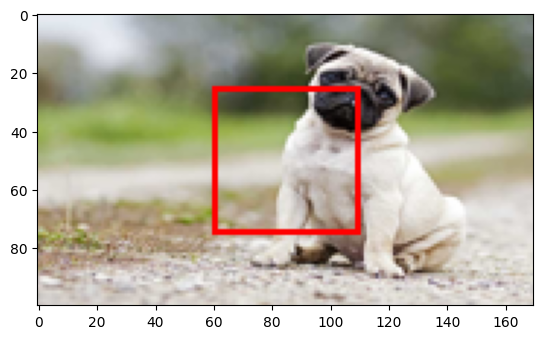

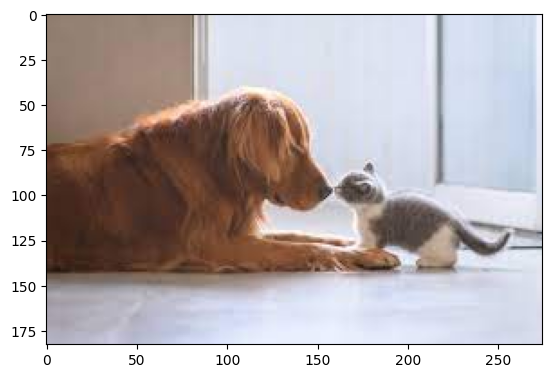

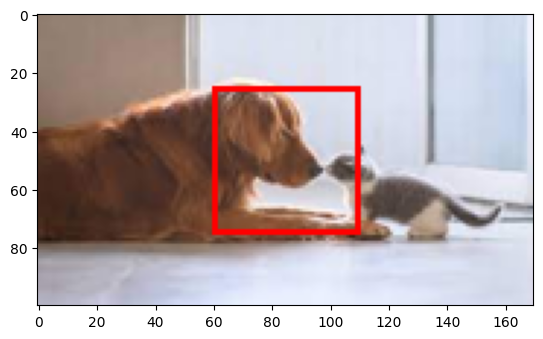

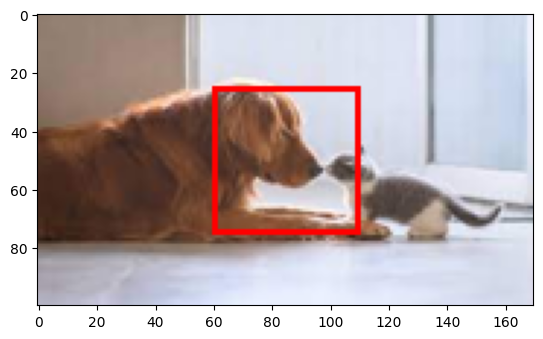

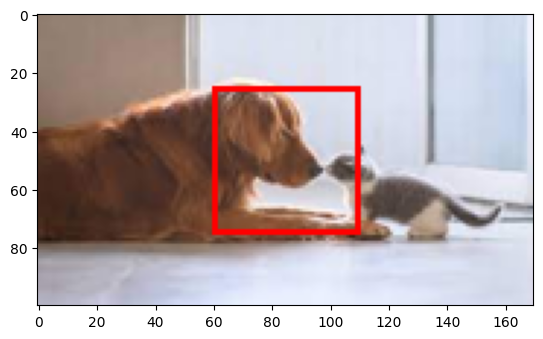

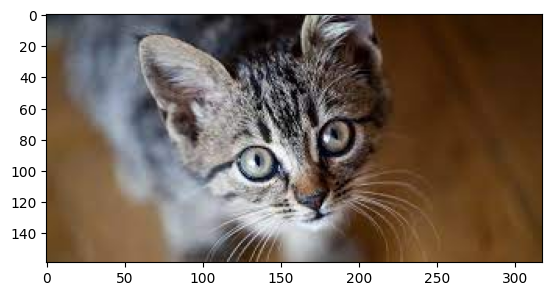

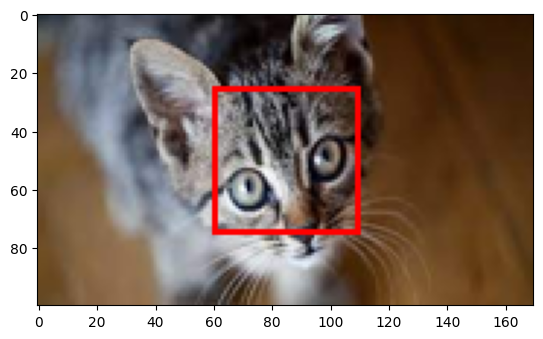

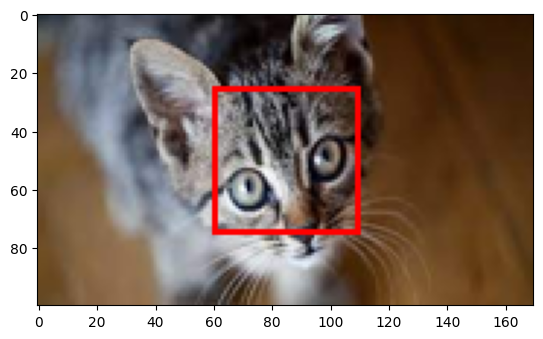

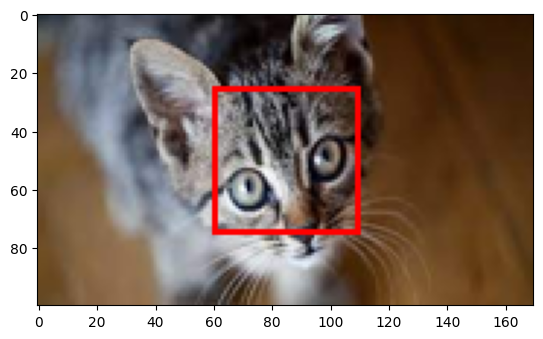

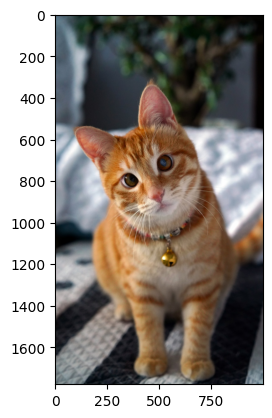

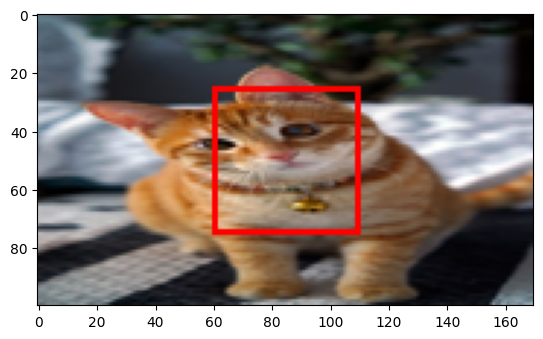

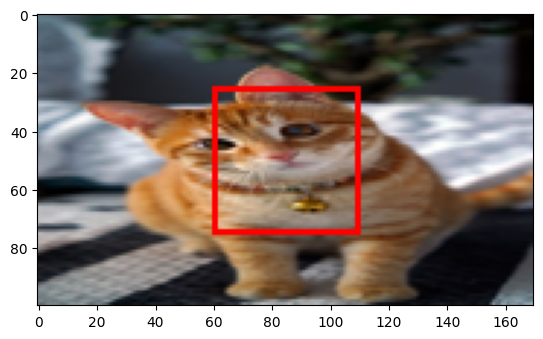

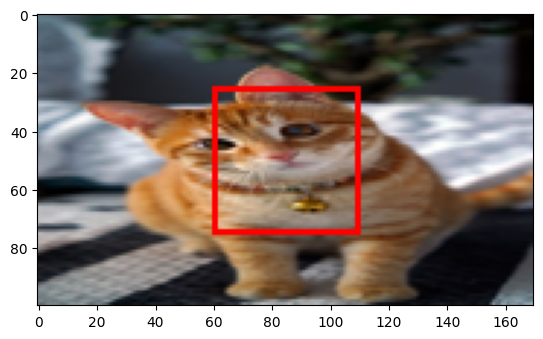

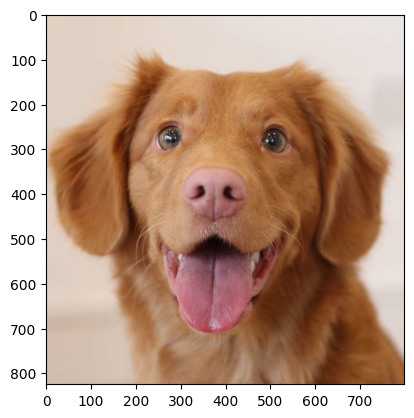

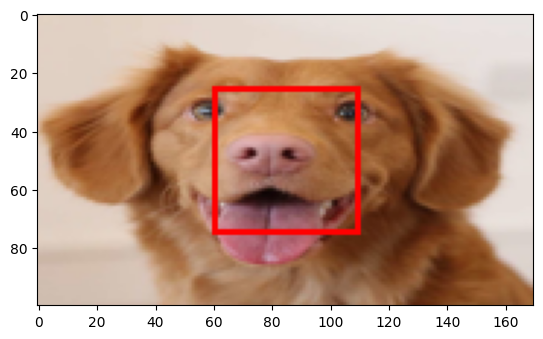

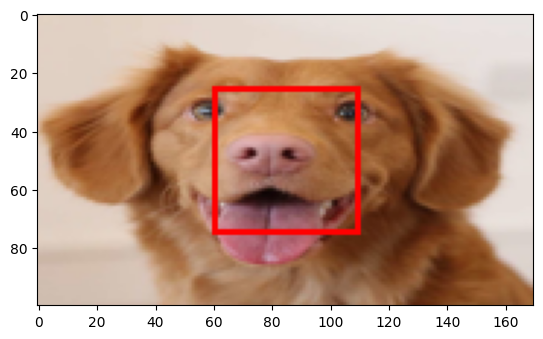

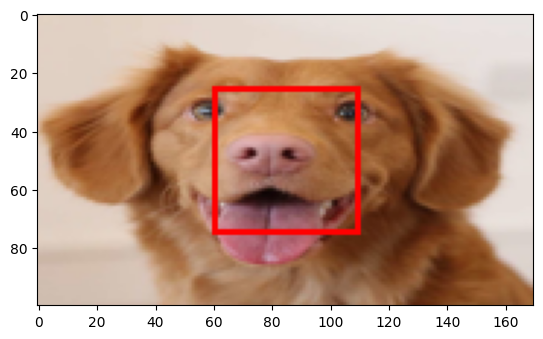

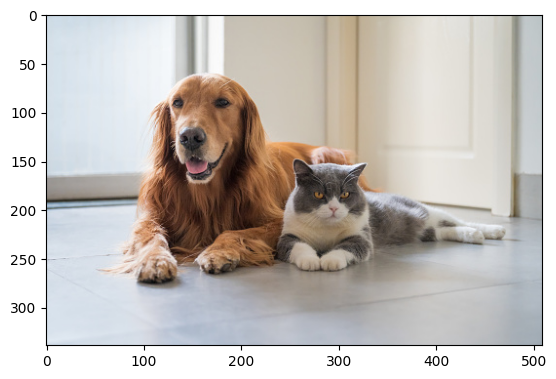

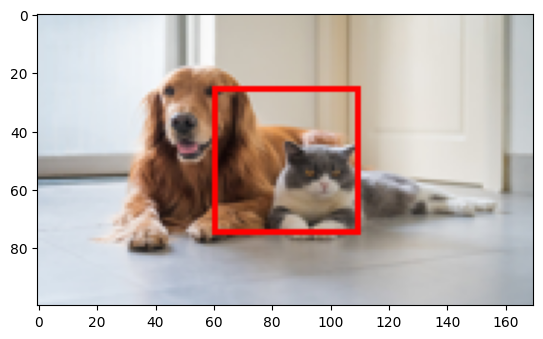

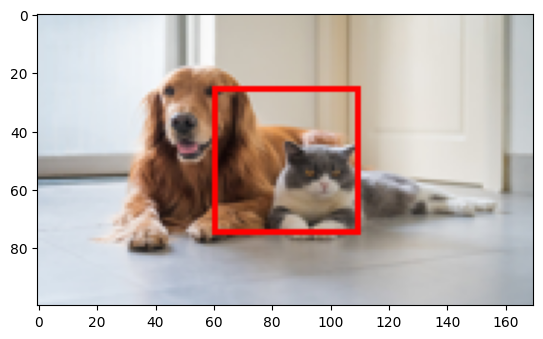

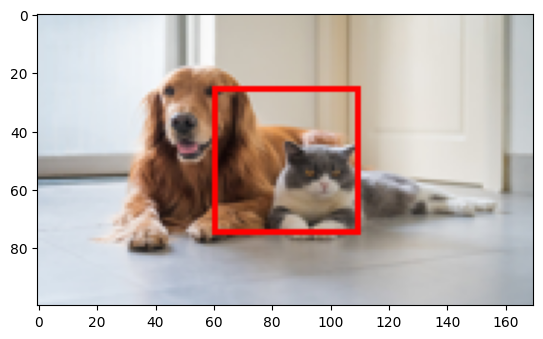

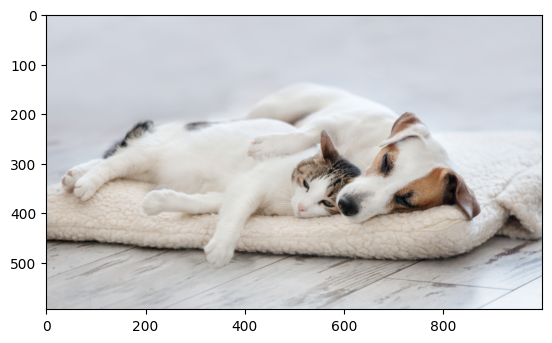

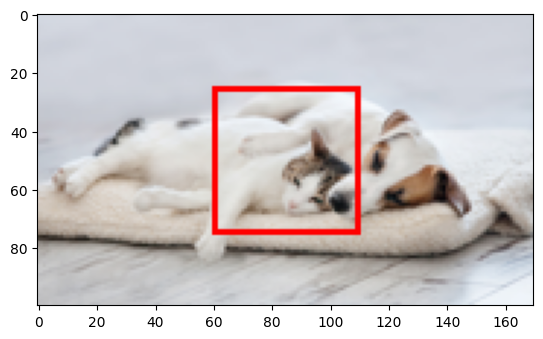

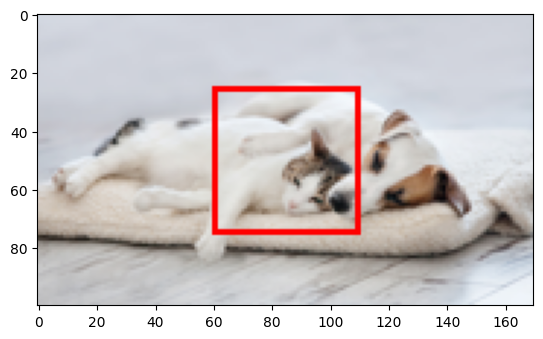

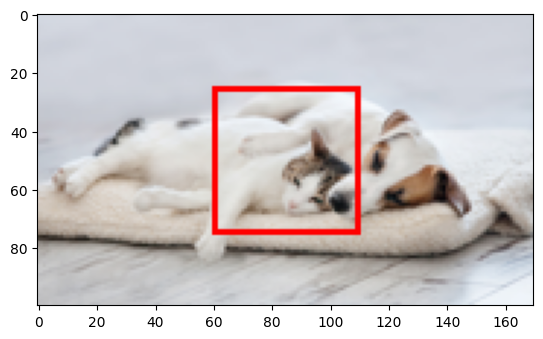

In [12]:
import os


input_dir = "images/"
output_dir = "resized_img/"

size = 3

# Create a labels file
labels_file = open(os.path.join(output_dir, "labels.txt"), "w")

for filename in os.listdir(input_dir):
    img = Image.open(os.path.join(input_dir, filename))
    img.save(os.path.join(output_dir, filename))
    labels_file.write(filename + " original\n")
    plt.imshow(img)
    plt.show()

    for i in range(size):
        new_img = img.resize((170, 100))
        draw = ImageDraw.Draw(new_img)
        box_size = 50  # Size of the bounding box
        center_x = new_img.size[0] // 2
        center_y = new_img.size[1] // 2
        box_coords = (center_x - box_size // 2, center_y - box_size // 2,
                      center_x + box_size // 2, center_y + box_size // 2)
        draw.rectangle(box_coords, outline="red", width=2)
        output_filename = f'{os.path.splitext(filename)[0]}_size_{i}.jpg'
        new_img.save(os.path.join(output_dir, output_filename))
        labels_file.write(output_filename + " resize\n")
        plt.imshow(new_img)
        plt.show()
        
labels_file.close()
